<a href="https://colab.research.google.com/github/codus10/IPColab/blob/main/20244334.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20244334 모채연 과제

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


연산 결과 픽셀 값이 0~255 범위를 벗어나지 않도록 제한(clamping)하는 함수.
영상 처리에서 덧셈·뺄셈·필터 적용 시 발생하는 값 초과/미만을 방지한다.

In [ ]:
def saturation(val):
  if val > 255:
    return 255
  elif val < 0:
    return 0
  else:
   return val

컬러 이미지를 BGR → Grayscale로 변환 (밝기 정보만 추출)
변환된 그레이스케일 이미지를 화면에 표시

(512, 512, 3)


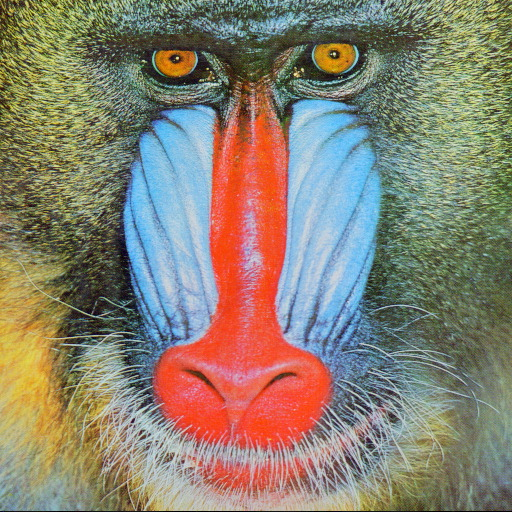

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/baboon.jpg')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(img)

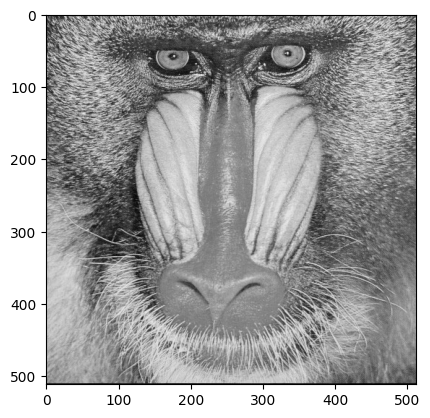

In [ ]:
plt.imshow(glmg1, cmap='gray')

그레이스케일 이미지(glmg1)의 히스토그램 계산 (0~255 밝기 범위, 총 256 구간)

계산된 히스토그램을 그래프로 표시

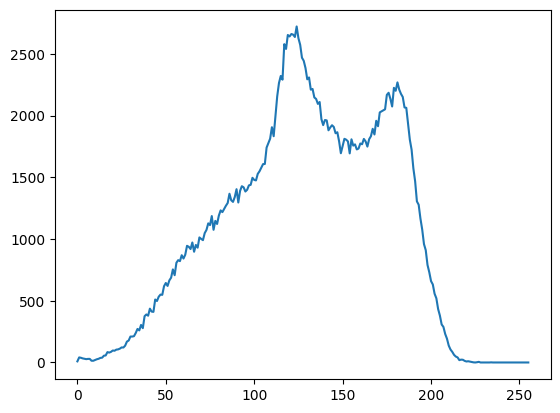

In [ ]:
hist = cv2.calcHist([glmg1], [0], None, [256], [0, 255])
plt.plot(hist)

LUT(Look-Up Table) 공간 생성: 0~255 밝기값을 변환하기 위한 매핑 테이블

출력 이미지 저장용 배열 생성 (입력 그레이스케일 이미지와 동일 크기)

In [ ]:
LUT = np.zeros(256, dtype = 'ubyte')

In [ ]:
gPoint = np.zeros((glmg1.shape[0], glmg1.shape[1]), dtype = np.ubyte)

LUT를 이용해 밝기 값을 비선형적으로 조정하는 코드

입력 이미지의 각 픽셀 밝기에 변환 함수를 적용해 전체적으로 밝기·명암을 재조정한다.

생성된 LUT를 이용해 실제 이미지의 모든 픽셀 밝기를 변화시키고 최종적으로 밝기 변환이 적용된 이미지를 출력한다.

In [ ]:
for i in range(256):
  val = 255 * (np.float32(i)/128-1) * (np.float32(i)/128-1)
  LUT[i] = saturation(val);

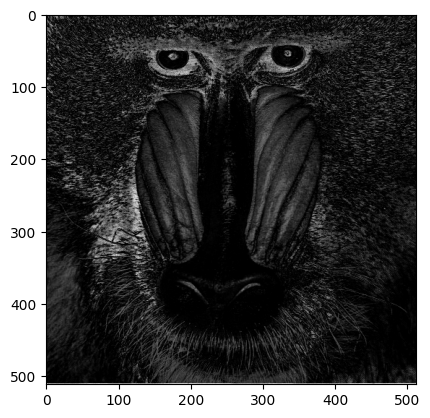

In [ ]:
for h in range(glmg1.shape[0]):
  for w in range(glmg1.shape[1]):
    gPoint[h,w] = LUT[glmg1[h,w]]

plt.imshow(gPoint, cmap='gray')

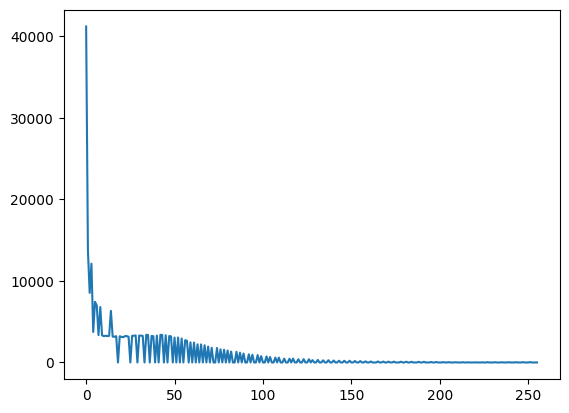

In [ ]:
hist = cv2.calcHist([gPoint], [0], None, [256], [0, 255])
plt.plot(hist)

(512, 512, 3)


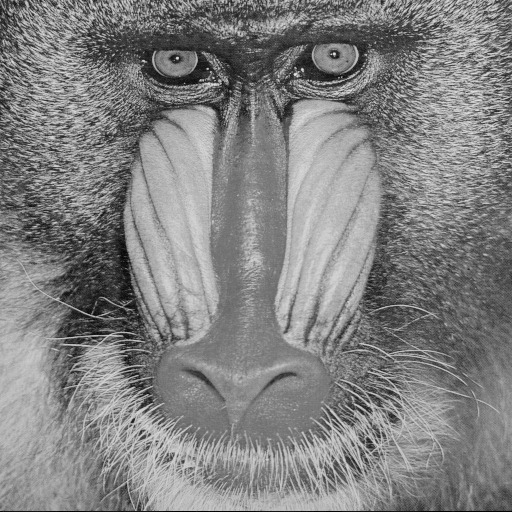

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/baboon.jpg')
print(img.shape)
gImg3 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gImg1, cmap='gray')
cv2_imshow(gImg3)

이진화 결과를 저장하기 위해 입력 이미지와 동일한 크기의 빈 배열을 생성한다.

모든 값을 0으로 초기화하고, 픽셀은 0~255 범위(ubyte)로 저장된다.

In [ ]:
gBin = np.zeros((gImg3.shape[0], gImg3.shape[1]), dtype = np.ubyte)

① 기본 이진화(Thresholding)

이미지의 픽셀 밝기값이 기준값(Threshold)보다 크면 흰색(255),
작으면 검정(0)으로 설정하여 이미지를 이진화한다.

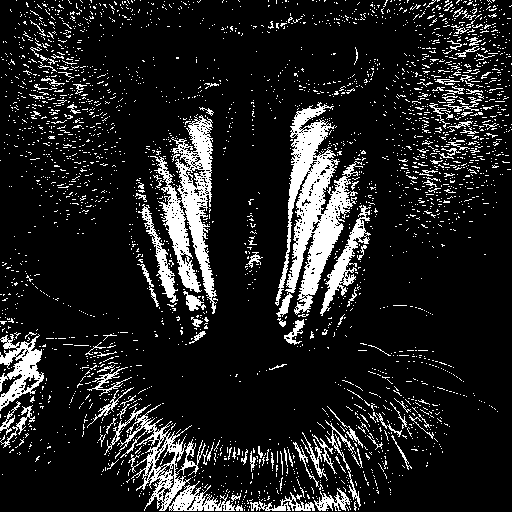

In [ ]:
Threshold = 180
for h in range(gImg3.shape[0]):
  for w in range(gImg3.shape[1]):
    if gImg3[h ,w] > Threshold:
      gBin[h, w] = 255
    else:
      gBin[h, w] = 0

cv2_imshow(gBin)

② 반복적 임계값 결정 함수 (Iterative Thresholding)

현재의 이진화 결과(bImg)를 기준으로

검은 영역 평균 밝기(avg1)

흰색 영역 평균 밝기(avg2)

를 다시 계산하여 새로운 임계값 T를 업데이트하는 함수.
이는 자동으로 더 적절한 임계값을 찾아가는 과정이다.

In [ ]:
T1 = 150
T2 = 0
T0 = 1

In [ ]:
def threshold_update(img, bImg):
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for h in range(gImg3.shape[0]):
   for w in range(gImg3.shape[1]):
    if(bImg[h, w] == 0):
      sum1 += np.int32(sum1 + img[h, w])
      count1 += 1
    else:
      sum2 += np.int32(sum2 + img[h, w])
      count2 += 1

  avg1 = sum1 / count1
  avg2 = sum2 / count2

  T = (avg1 + avg2) / 2

  return T

③ 새로운 T1 임계값을 이용한 두 번째 이진화

업데이트된 임계값(T1)을 기준으로 다시 한 번 이진화를 수행하여
더 정교한 흑/백 분리 결과를 얻는다.

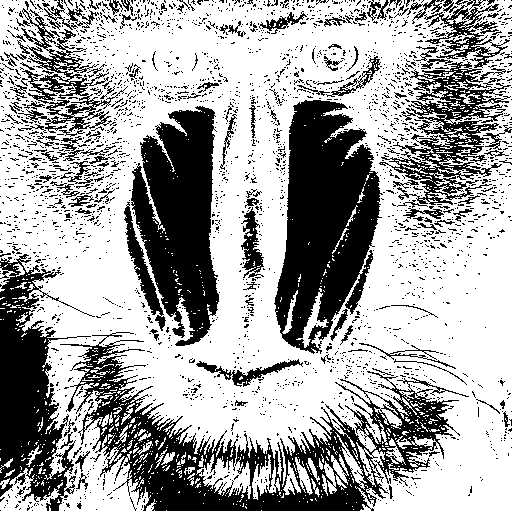

In [ ]:
for h in range(gImg3.shape[0]):
  for w in range(gImg3.shape[1]):
    if gImg3[h, w] > T1:
      gBin[h, w] = 0
    else:
      gBin[h, w] = 255

cv2_imshow(gBin)

(512, 512, 3)


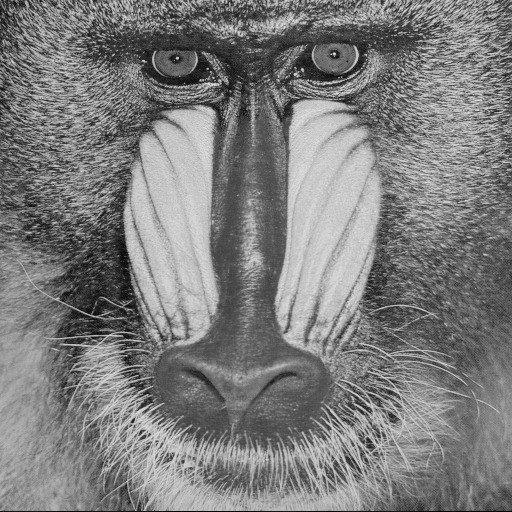

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/baboon.jpg')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gImg)

픽셀 값이 처리 과정에서 0-255 범위를 벗어날 수 있기 때문에,이를 다시 0~255 범위 안으로 제한(clamping) 하는 함수이다.
이미지 연산 중 overflow/underflow를 방지하는 역할을 한다.

In [ ]:
def saturation(value):
  if (value > 255):
    value = 255
  elif (value < 0):
    value = 0
  return value

3×3 평균 필터 커널 생성

3×3 크기의 행렬을 모두 1로 만든 뒤 9로 나눠 평균 필터(Mean Filter)를 만든다.
이는 각 픽셀을 주변 3×3 이웃 픽셀들의 평균값으로 바꾸기 위한 커널이다.

In [ ]:
kernel3 = np.ones((3,3),np.float32)/9

평균 필터(Mean Filter) 적용

filter2D() 함수를 이용해 위에서 만든 평균 필터를 원본 영상(gImg)에 적용한다.
평균 필터는 영상의 잡음을 제거하고 부드럽게 만드는 스무딩(Smoothing) / 블러링 효과가 있다.
결과적으로 노이즈가 줄어들고 전체적으로 흐릿해진 이미지가 출력된다.

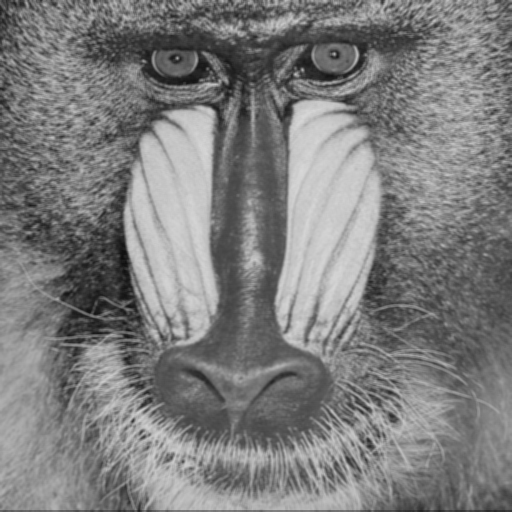

In [ ]:
output = cv2.filter2D(gImg,-1,kernel3)
cv2_imshow(output)

In [ ]:
gOut = np.zeros((gImg.shape[0],gImg.shape[1]), dtype=np.ubyte)

이 코드는 3×3 평균 필터(Mean Filter)를 직접 구현한 것이다.
각 픽셀 주변(3×3 영역)의 값을 가져와 커널과 곱한 뒤 모두 더해 평균을 구하고,
saturation()으로 0~255 범위를 벗어나지 않도록 조정하여 출력 영상 gOut에 저장한다.
결과적으로 이미지의 노이즈가 감소하고 전체적으로 부드러워지는 스무딩 효과가 나타난다.

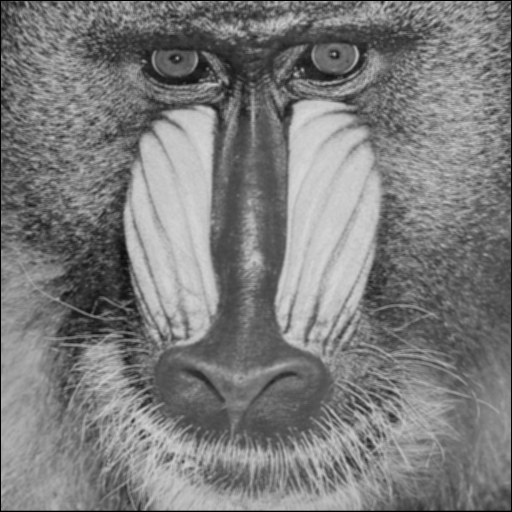

In [ ]:
for h in range(1,gImg.shape[0]-1):
  for w in range(1,gImg.shape[1]-1):
    sum = 0
    for i in range(-1,2):
      for j in range(-1,2):
        sum += gImg[h+i,w+j] * kernel3[i+1,j+1]
    sum = saturation(sum)
    gOut[h,w] = sum
cv2_imshow(gOut)

이 커널은 중심 픽셀을 강조하고 주변 픽셀을 억제하는 샤프닝(Sharpening) 필터이다.

In [ ]:
kernel3[0][0] = -1/9
kernel3[0][1] = -1/9
kernel3[0][2] = -1/9
kernel3[1][0] = -1/9
kernel3[1][1] = 8/9
kernel3[1][2] = -1/9
kernel3[2][0] = -1/9
kernel3[2][1] = -1/9
kernel3[2][2] = -1/9


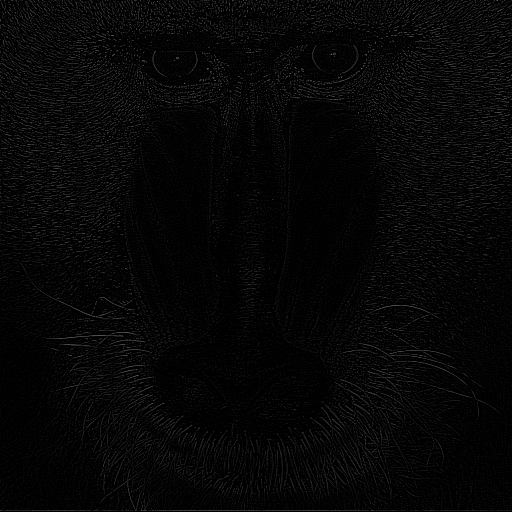

In [ ]:
output = cv2.filter2D(gImg,-1,kernel3)
cv2_imshow(output)

(512, 512, 3)


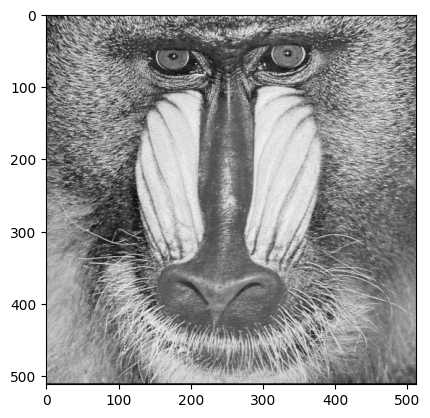

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/baboon.jpg')
print(img.shape)
gImg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gImg1, cmap ='gray')

OpenCV의 medianBlur() 함수를 사용하여
3×3 크기의 중간값 필터(Median Filter) 를 영상에 적용한 것이다.

중간값 필터는 주변 픽셀(3×3) 중 중간값을 선택하여 노이즈를 제거하는 비선형 필터이며,
특히 Salt-and-Pepper 노이즈(흰 점, 검은 점) 제거에 효과적이다.

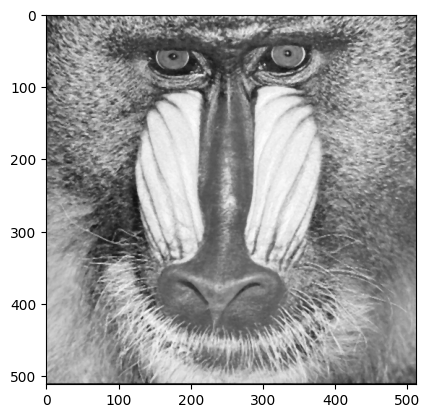

In [ ]:
outImg = cv2.medianBlur(gImg1, 3)
plt.imshow(outImg, cmap ='gray')

이 코드는 Sobel, Prewitt 등 여러 종류의 에지 검출 마스크(gx, gy)를 사용해
영상에서 수평·수직 방향의 경계를 검출하는 실험을 수행한다.


filter2D()로 x·y 방향의 기울기를 계산한 뒤,
이를 convertScaleAbs()로 정규화하고 addWeighted()로 합쳐
최종적인 에지 영상을 생성한다.

In [ ]:
gx = np.array([[-1, 0], [0, 1]], dtype=int)
gy = np.array([[0, -1], [1, 0]], dtype=int)

In [ ]:
gx = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 0]], dtype=int)
gy = np.array([[0, 0, -1], [0, 1, 0], [0, 0, 0]], dtype=int)

In [ ]:
gx = np.array([[-1, 0, 0], [-2, 0, 2], [-1, 0, 1]], dtype=int)
gy = np.array([[1, 2, 1], [0, 1, 0], [-1, -2, -1]], dtype=int)

In [ ]:
gx = np.array([[-1, 0, 0], [-1, 0, 1], [-1, 0, 1]], dtype=int)
gy = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)

In [ ]:
x = cv2.filter2D(gImg, -1, gx)
y = cv2.filter2D(gImg, -1, gy)

In [ ]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

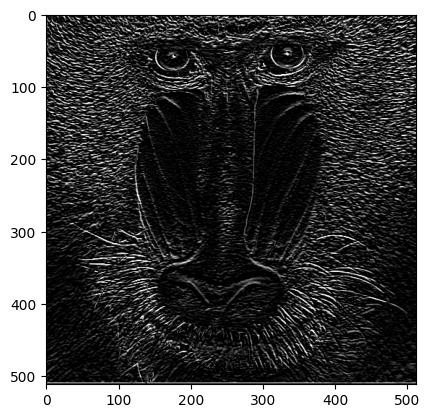

In [ ]:
outimg = cv2.addWeighted(absX, 1, absY, 1, 0)
plt.imshow(outimg, cmap='gray')

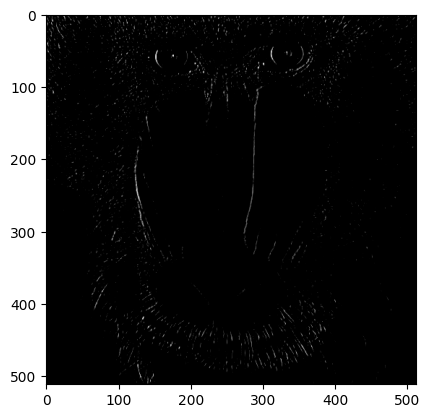

In [ ]:
plt.imshow(absX, cmap='gray')

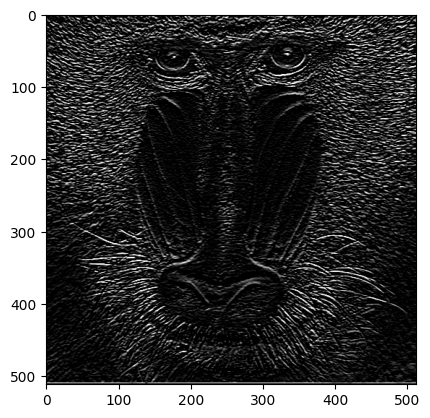

In [ ]:
plt.imshow(absY, cmap='gray')

(512, 512, 3)


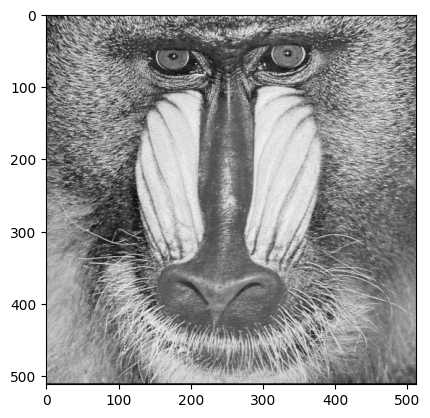

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/baboon.jpg')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gImg, cmap = 'gray')

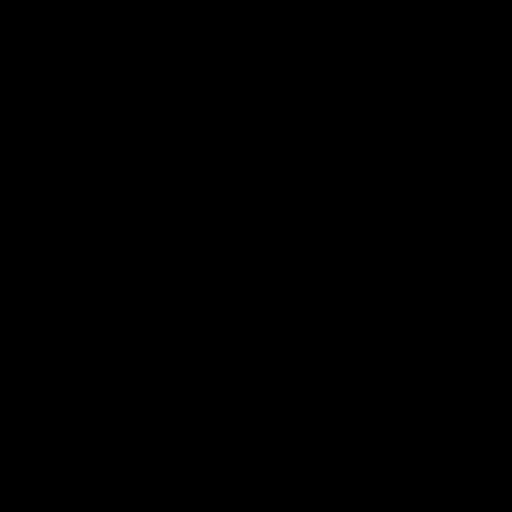

In [ ]:
outImg = np.zeros(gImg.shape, dtype = np.uint8)
cv2_imshow(outImg)

영상 확대(Scaling) – Nearest Neighbor 방식

y, x 위치의 픽셀을 스케일링 비율(3)로 나누어
원본 영상의 (h, w) 위치를 가져오는 방식

최근접 이웃 보간(Nearest Neighbor Interpolation)

결과: 계단현상(픽셀 크게 보임)이 있는 3배 확대 이미지 생성

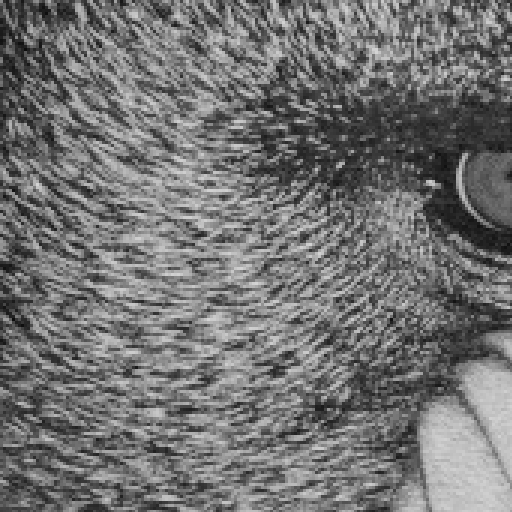

In [ ]:
scaling = 3

for y in range(gImg.shape[0]):
  for x in range(gImg.shape[1]) :
    h = int(y/scaling)
    w = int(x/scaling)
    if h < gImg.shape[0] and w < gImg.shape[1] :
      outImg[y,x] = gImg[h,w]

cv2_imshow(outImg)

In [ ]:
height, width = gImg.shape
print(height, width)

512 512


In [ ]:
M = cv2.getRotationMatrix2D((width/2.0, height/2.0), 45, 1)
print(M)

[[   0.70710678    0.70710678 -106.03867197]
 [  -0.70710678    0.70710678  256.        ]]


영상 회전 (warpAffine)

아핀 변환 함수 warpAffine()을 사용하여
위에서 만든 회전 행렬을 적용함

결과: 영상이 중심 기준으로 45도 회전된 이미지 출력됨

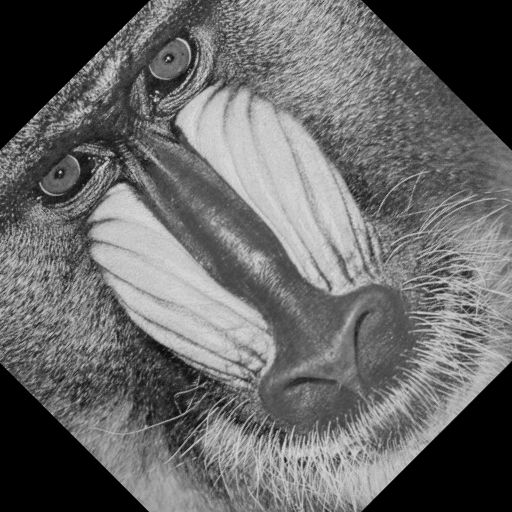

In [ ]:
outImg = cv2.warpAffine(gImg, M, (width, height))
cv2_imshow(outImg)

(512, 512, 3)


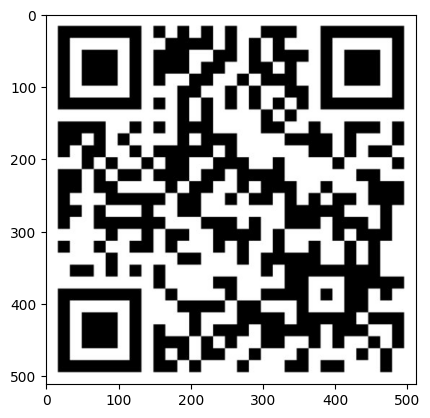

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/QR.jpg')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gImg, cmap = 'gray')

7×7 커널 생성

팽창(Dilation)

밝은 영역(흰색)이 주변으로 퍼지는 효과.

노이즈 제거, 글씨 굵게 만들기, 객체 강조 등에 사용.

iterations=1 → 한 번만 팽창 수행.

결과 이미지 특징:

밝은 영역이 확장되어 원래 이미지보다 윤곽이 두꺼워짐.

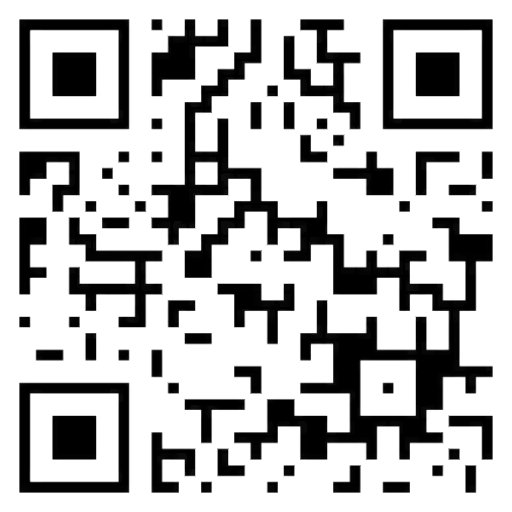

In [ ]:
kernel = np.ones((7,7),np.uint8)
dilateImg = cv2.dilate(gImg,kernel,iterations = 1)
cv2_imshow(dilateImg)

팽창 이미지 - 원본 이미지 → 에지(edge) 검출

이 방식은 **모폴로지 그라디언트(morphological gradient)**와 같은 원리임.

팽창된 이미지는 밝은 부분이 바깥으로 퍼져 있음.

원본 이미지는 퍼지기 전 상태.

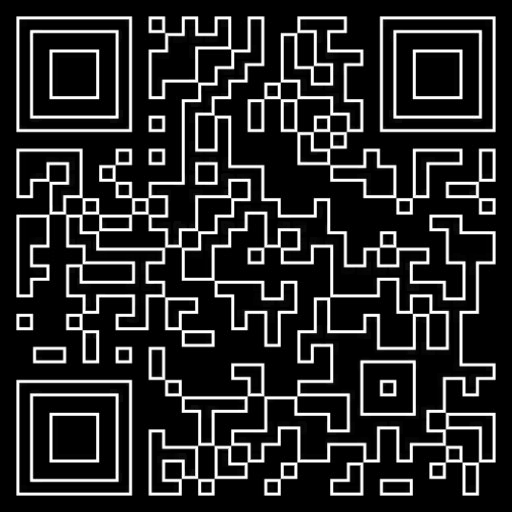

In [ ]:
edgeImg = dilateImg - gImg
cv2_imshow(edgeImg)